# Data Integrated Analysis

The goal of this notebook is to analyse the data collected and integrated from Hydrometric and Water Quality dataframes. The main idea is to verify the frequence of NULL values presented on this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the CSV

In [127]:
from datetime import datetime

df = pd.read_csv('data_integrated.csv', sep=',')
df['DATE'] = pd.to_datetime(df['DATE'])
df.head(3)

,DATE,02HB001,02HB008,02HB013,02HB018,02HB025,02HB029,02HB031,AMMONIUM_6007600302,CALCIUM_6007600302,...,NITRATES TOTAL_6007602302,POTASSIUM_6007602302,SODIUM_6007602302,AMMONIUM_6007605002,CALCIUM_6007605002,CHLORIDE_6007605002,MAGNESIUM_6007605002,NITRATES TOTAL_6007605002,POTASSIUM_6007605002,SODIUM_6007605002
0,2010-01-01,1.513,2.233,11.216,3.919,2.676,4.524,2.032,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,1.513,2.206,11.212,3.912,2.684,4.723,2.065,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,1.516,2.212,11.210,3.983,2.751,5.239,2.091,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Hydrometric Analysis

First we want to see the percentage of NULL values for each station. The following cell collects these statistics and store in the **data** variable.

In [3]:
years = range(2010,2019)
hydrometric_stations = df.columns[1:8]
data = []
max_missing = 0
for year in years:
    min_date = datetime(year,1,1)
    max_date = datetime(year+1,1,1)
    row = []
    for station in hydrometric_stations:
        sub_df = df[['DATE',station]]
        missing_values = sub_df[(sub_df.DATE >= min_date) & (sub_df.DATE < max_date)][station].isna().sum()
        if(missing_values/365 > max_missing):
            max_missing = missing_values/365
        row.append(missing_values)
    row = np.round(np.array(row)/365, 2)
    data.append(row)
data = np.array(data)
data = data.T

### 1.1. Missing data over the years for each hydrometric station

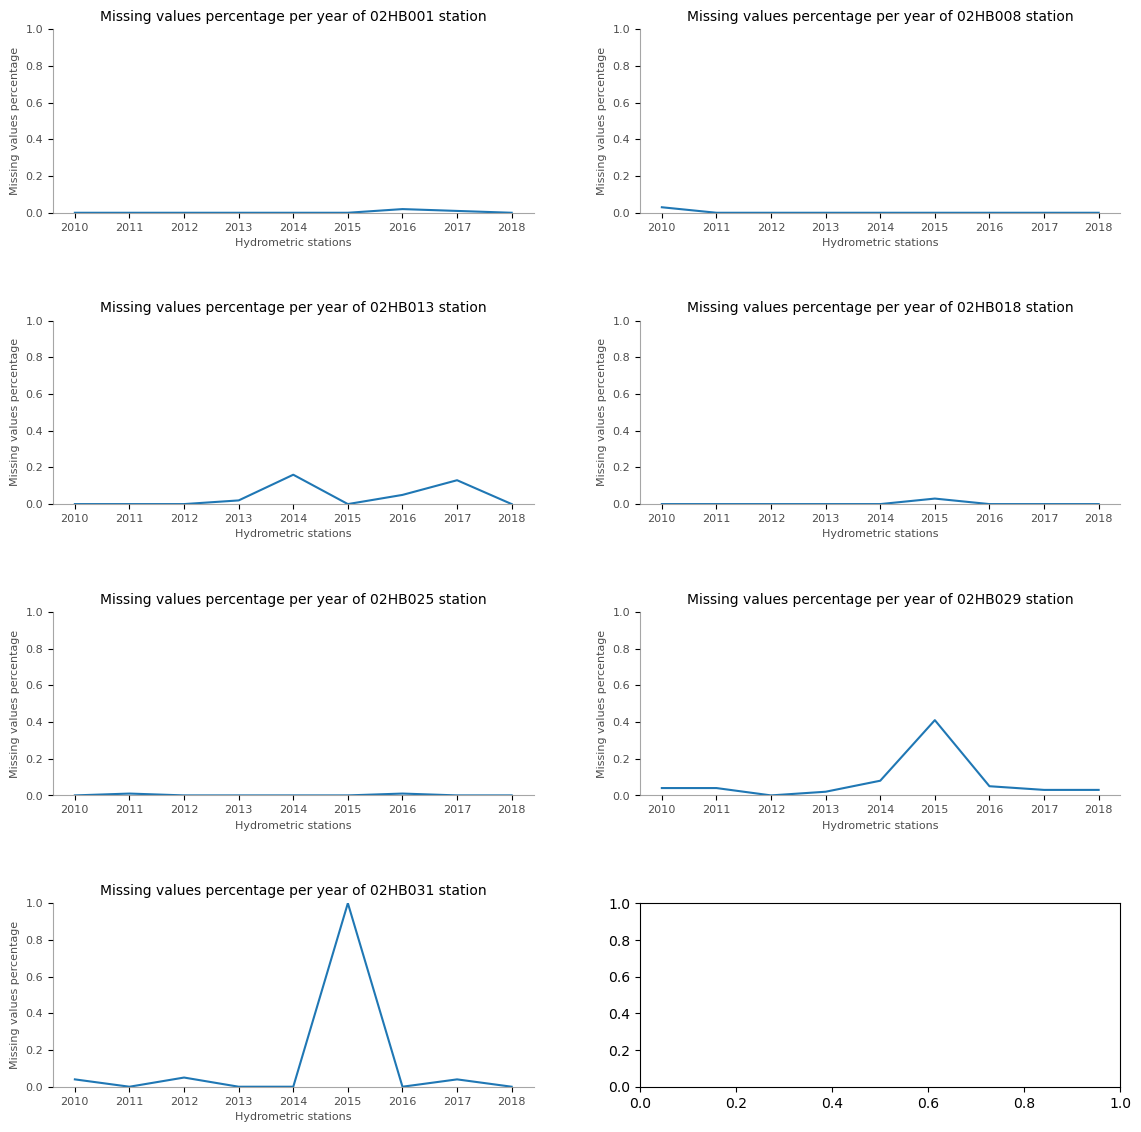

In [4]:
alpha = 0.7
fig, axs = plt.subplots(4,2)
plt.tight_layout(pad=1.0)
fig.set_figheight(12)
fig.set_figwidth(12)
for i, year in enumerate(hydrometric_stations):
    x = int(i/2)
    y = i % 2
    # ----- Graph design -----
    # Xticks and Yticks
    for label in axs[x,y].get_xticklabels() + axs[x,y].get_yticklabels():
        label.set_alpha(alpha)
        label.set_size(8)
    # Spines
    for spine in axs[x,y].spines.values():
        spine.set_color('gray')
        spine.set_alpha(alpha)
    axs[x,y].spines['top'].set_alpha(0)
    axs[x,y].spines['right'].set_alpha(0)
    # Labels
    axs[x,y].set_xlabel('', alpha=alpha, fontsize=8)
    axs[x,y].set_ylabel('', alpha=alpha, fontsize=8)

    # Content
    axs[x,y].set_title(f'Missing values percentage per year of {hydrometric_stations[i]} station', size=10)
    axs[x,y].set_xlabel('Hydrometric stations')
    axs[x,y].set_ylabel('Missing values percentage')
    axs[x,y].set_ylim(0, max_missing)
    axs[x,y].plot(years, data[i])

### 1.2. Heatmap of missing data over the years

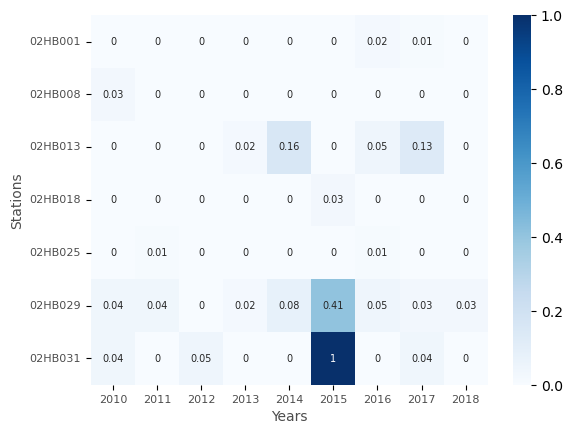

In [5]:
alpha = 0.7
heatmap = sns.heatmap(data, annot=True, xticklabels=years, yticklabels=hydrometric_stations, annot_kws={'fontsize': 7}, cmap='Blues')
plt.xlabel('Years', size=10, alpha=alpha)
plt.ylabel('Stations', size=10, alpha=alpha)
heatmap.tick_params(axis='x', labelsize=8)
heatmap.tick_params(axis='y', labelsize=8)

for label in heatmap.get_xticklabels():
    label.set_alpha(alpha)  # Set alpha to 0.5 for xticks

for label in heatmap.get_yticklabels():
    label.set_alpha(alpha)  # Set alpha to 0.5 for yticks

plt.show()

### 1.3. Interactive table for DATE details of missing data

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Stations dropdown widget
stations = df.columns[1:8]
dropdown = widgets.Dropdown(
    options=stations,
    value=stations[0],
    description='Station: :',
    disabled=False,
)
display(dropdown)

# Years dropdown widget
years = range(2010,2019)
dropdown_years = widgets.Dropdown(
    options=years,
    value=years[0],
    description='Year: :',
    disabled=False,
)
display(dropdown_years)


station = stations[0]
year = years[0]
def on_value_change(change):
    global station
    global year
    clear_output()
    display(dropdown)
    display(dropdown_years)

    if(isinstance(change['new'], int)):
        year = change['new']
    else:
        station = change['new']
    min_date = datetime(year,1,1)
    max_date = datetime(year+1,1,1)
    sub_df = df[[station, 'DATE']]
    sub_df = sub_df[(sub_df.DATE >= min_date) & (sub_df.DATE < max_date)]  
    display(sub_df[sub_df[station].isna()])

dropdown.observe(on_value_change, names='value')
dropdown_years.observe(on_value_change, names='value')


Dropdown(description='Station: :', index=1, options=('02HB001', '02HB008', '02HB013', '02HB018', '02HB025', '0…

Dropdown(description='Year: :', index=8, options=(2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018), value…

,02HB008,DATE


### 1.4. Comments

The missing data is usually a period during the year without collecting data. A few times it may has two small periods during the year.

02HB029 and 02HB031 are the stations with more missing data.

2015 is the worst year.

## 2. Water Quality Analysis

In [7]:
sub_df = df.iloc[:,8:]
quality_columns = []
stations = np.array([])
for i in range(7):
    start = i*7
    columns = np.array(sub_df.columns[start:start+7])
    columns = np.append(columns, 'DATE')
    quality_columns.append(columns)
    stations = np.union1d(stations, columns[0].split('_')[1])

In [110]:
data = []
for year in range(2010,2019):
    row_year = []
    for i, station in enumerate(stations):
        values = []
        for j, measure in enumerate(quality_columns[i][:-1]):
            min_date = datetime(year=year, month=1, day=1)
            max_date = datetime(year=year+1, month=1, day=1)
            sub_df = df[quality_columns[i]]
            sub_df = sub_df[sub_df.notna().any(axis=1)]
            sub_df = sub_df[(sub_df.DATE >= min_date) & (sub_df.DATE < max_date)][[measure, 'DATE']]
            sub_df = sub_df[sub_df.isna().any(axis=1) == False]
            available_months = []
            for date in sub_df.DATE.values:
                available_months.append(pd.to_datetime(date).month)
            row = []
            for month in range(1,13):
                if(month in available_months):
                    row.append(j)
                else:
                    row.append(None)
            values.append(row)
        row_year.append([station, values])    
    data.append(row_year)

Dropdown(description='Station: :', options=(2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018), value=2010)

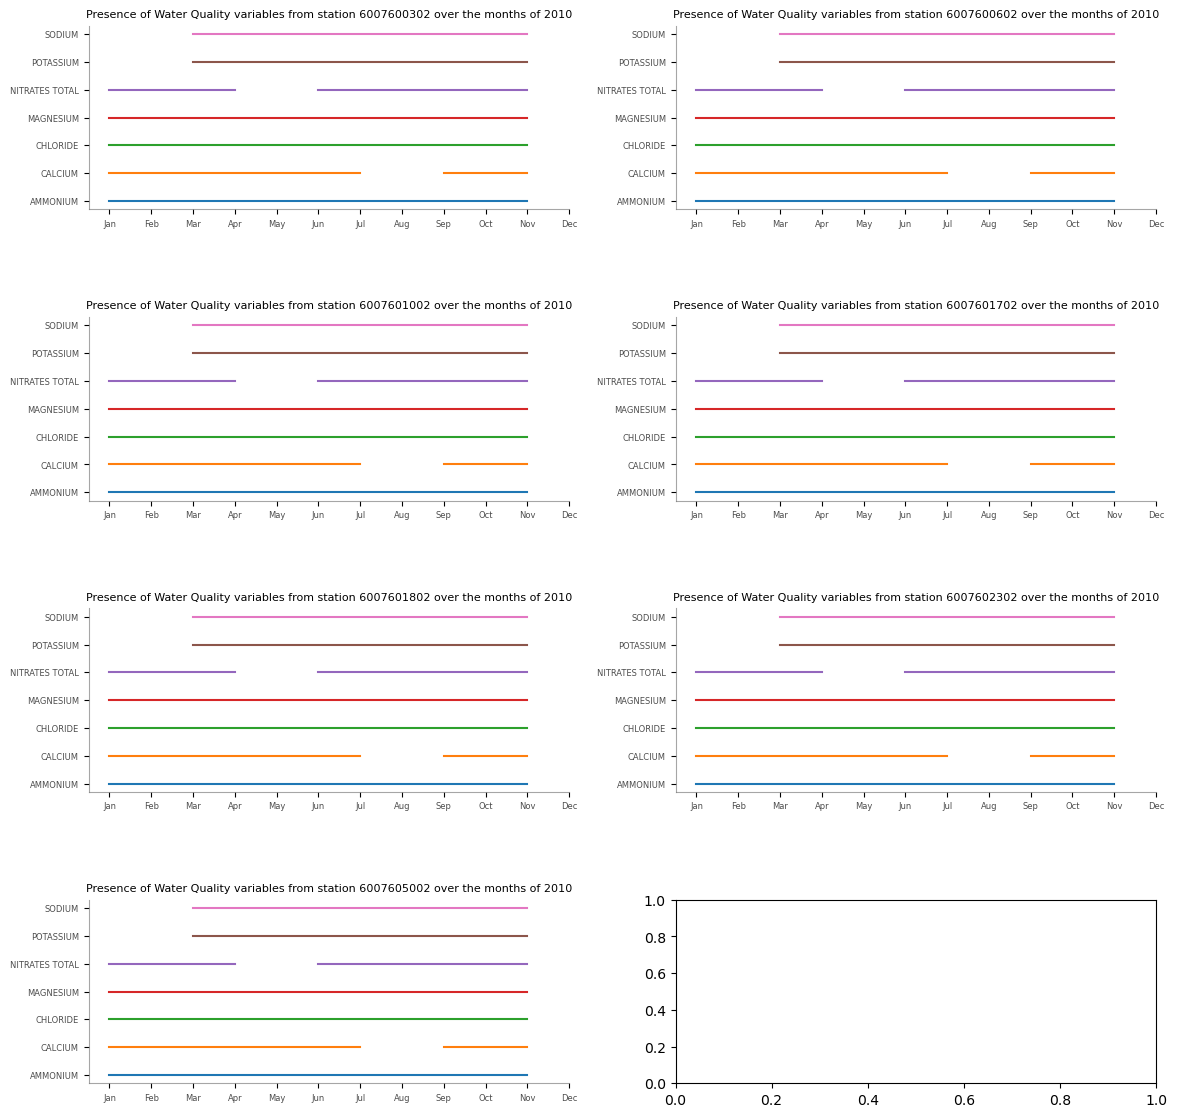

In [ ]:
measures = ['AMMONIUM', 'CALCIUM', 'CHLORIDE', 'MAGNESIUM', 'NITRATES TOTAL', 'POTASSIUM', 'SODIUM']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = range(2010,2019)

# Years widget
dropdown = widgets.Dropdown(
    options=years,
    value=years[0],
    description='Station: :',
    disabled=False,
)
display(dropdown)

def on_value_change(change):
    global year
    clear_output()
    display(dropdown)
    year = change['new']
    year_idx = years.index(year)

    fig, axs = plt.subplots(int(len(data[year_idx])/2+1), 2)
    plt.tight_layout(pad=1.0)
    fig.set_figheight(12)
    fig.set_figwidth(12)
    for i in range(len(data[year_idx])):
        x = int(i/2)
        y = i % 2
        # ----- Graph design -----
        # Xticks and Yticks
        for label in axs[x,y].get_xticklabels() + axs[x,y].get_yticklabels():
            label.set_alpha(alpha)
            label.set_size(6)
        # Spines
        for spine in axs[x,y].spines.values():
            spine.set_color('gray')
            spine.set_alpha(alpha)
        axs[x,y].spines['top'].set_alpha(0)
        axs[x,y].spines['right'].set_alpha(0)
        # Labels
        axs[x,y].set_xlabel('', alpha=alpha, fontsize=8)
        axs[x,y].set_ylabel('', alpha=alpha, fontsize=8)

        measure = data[year_idx][i]
        for plot in measure[1]:
            axs[x,y].plot(months, plot)
        axs[x,y].set_xticks(range(0,12))
        axs[x,y].set_yticks(range(0,7))
        axs[x,y].set_xticklabels(months)
        axs[x,y].set_yticklabels(measures)
        axs[x,y].set_title(f'Presence of Water Quality variables from station {measure[0]} over the months of {year}', size=8)

dropdown.observe(on_value_change, names='value')

### 2.1. Comments

The missing data gaps are usually the same for every station for water quality.  

2011, 2012, 2017* and 2018 are the most consistents years.

2014, 2016 are the years with more missing data.